In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import os
import pandas as pd
import scipy.stats as sts
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rcParams,font_manager,colors,patches

In [2]:
rcParams['figure.figsize'] = (6,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

In [3]:
direc = 'C:/Users/svo/Google Drive/Bas Games/Analysis/'
bayeselo_direc = 'C:/Users/svo/Documents/Sourcetree repos/fourinarow/Analysis notebooks/new/'

In [4]:
def create_bayeselo_input(results,name):
    with open(name,'w') as f:
        for black,white,r in results:
            outcome = ('1-0' if r==1 else ('0-1' if r==-1 else '1/2-1/2'))
            print('[White \"' + black +'\"]',file=f)
            print('[Black \"' + white +'\"]',file=f)
            print('[Result \"' + outcome +'\"]',file=f)
            print(outcome,file=f)
            print(file=f)
            
def run_bayeselo(names):
    wd = os.getcwd()
    os.chdir(bayeselo_direc)
    bayeselo_input = '\n'.join(['readpgn ' + name for name in names] + ['elo','mm 1 1','ratings','x','x'])
    bayeselo_output = subprocess.check_output('bayeselo.exe',input=bayeselo_input, text=True, stderr=subprocess.STDOUT).split('\n')
    os.chdir(wd)
    start_line = [i+1 for i,line in enumerate(bayeselo_output) if line.startswith('ResultSet-EloRating>Rank')][0]
    df = pd.DataFrame([line.split() for line in bayeselo_output[start_line:-1]],
                  columns = ['','Name','Elo','','','','','',''])[['Name','Elo']]
    df['Elo'] = df['Elo'].astype(int)
    elo_ratings = dict(df.values)
    return elo_ratings

In [5]:
with open(direc + 'Ratings/tournament_results_short.txt','r') as f:
    results = [line.split('\t')[:2] + [int(line.split('\t')[2])] for line in f.read().splitlines()]

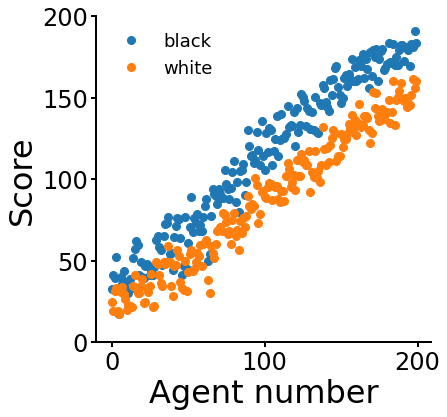

In [6]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

r = np.loadtxt(direc + 'Ratings/tournament_results_short.txt')
ax.plot([np.sum(1/2+r[r[:,0]==i,2]/2) for i in range(200)],'.',label='black')
ax.plot([np.sum(1/2-r[r[:,1]==i,2]/2) for i in range(200)],'.',label='white')
ax.legend(loc='upper left')
ax.set_xlabel('Agent number')
ax.set_ylabel('Score')
ax.set_ylim([0,200])
plt.show()

In [43]:
create_bayeselo_input(results,direc + 'Ratings/tournament_results_short.pgn')

In [44]:
elo = run_bayeselo([direc + 'Ratings/tournament_results_short.pgn'])

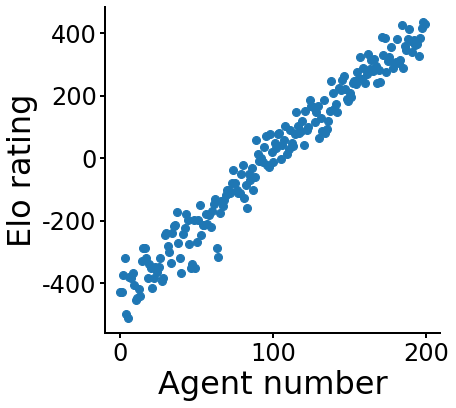

In [64]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.plot([elo[str(i)] for i in range(200)],'.')

ax.set_xlabel('Agent number')
ax.set_ylabel('Elo rating')

plt.show()

In [22]:
np.savetxt('C:/Users/svo/Documents/Sourcetree repos/fourinarow/elo.txt',[elo[str(i)] for i in range(1650)])

In [7]:
with open(direc + 'Peak\peak_paper.pgn') as f:
    peak_games = f.read().split('\n\n')

In [8]:
peak_games_short = '\n\n'.join([game for game in peak_games if '_block' in game] + 
                               list(np.random.choice([game for game in peak_games if not '_block' in game],0,replace=False)))

In [9]:
with open(direc + 'Peak/peak_games_short.pgn','w') as f:
    print(peak_games_short,file=f)

In [10]:
elo_peak_games_short = run_bayeselo([direc + 'Peak/peak_games_short.pgn'])

In [11]:
peak_opponents = [player for player in elo_peak_games_short.keys() if player.startswith('peak_opp')]

In [12]:
peak_opponents

['peak_opp_150_165',
 'peak_opp_180_199',
 'peak_opp_170_199',
 'peak_opp_175_185',
 'peak_opp_110_130',
 'peak_opp_140_160',
 'peak_opp_80_100',
 'peak_opp_70_90',
 'peak_opp_50_70',
 'peak_opp_5_10',
 'peak_opp_30_55',
 'peak_opp_20_40',
 'peak_opp_10_20']

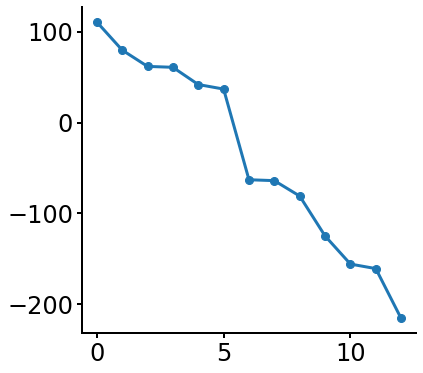

NameError: name 'elo_peak_agents_vs_expt_agents' is not defined

In [13]:
plt.plot([elo_peak_games_short[opp] for opp in peak_opponents],'.-')
plt.show()

plt.plot([elo_peak_agents_vs_expt_agents[opp] for opp in peak_opponents],'.-')
plt.show()

plt.plot([elo_peak_games_short[opp] for opp in peak_opponents],
         [elo_peak_agents_vs_expt_agents[opp] for opp in peak_opponents],'.')
plt.show()

In [14]:
elo_ratings_all = run_bayeselo([direc + 'Peak/peak_vs_expt.pgn',direc + 'Peak/peak_games_short.pgn',
                                direc + 'Ratings/games_results_eye.pgn',direc + 'Ratings/games_results_gen.pgn',
                                direc + 'Ratings/games_results_learn.pgn',direc + 'Ratings/games_results_tai.pgn'])


In [15]:
import json
with open(direc + 'Ratings/ratings_all_expts_peak.txt','w') as f:
    json.dump(elo_ratings_all,f)

In [16]:
elo_ratings_all

{'fABZPBZeyK_block60': 621,
 'fABZPBZeyK_block80': 621,
 'sELnhlAOlw_block100': 594,
 'oMIJfwyfLf_block100': 583,
 'jIdlECroRn_block100': 579,
 'lzvghoHBjV_block100': 579,
 'qqRgzzCULF_block100': 578,
 'BqLPCGwgcd_block100': 517,
 'jOUNGtfqKU_block100': 456,
 'MtMTzHIXdG_block60': 453,
 'VrgDokGytk_block60': 453,
 'FJaZdviNIP_block80': 453,
 'MtMTzHIXdG_block80': 453,
 'TYbuYzsVJi_block100': 453,
 'lzvghoHBjV_block80': 450,
 'zWYEuHEkIG_block80': 447,
 'lLyHzPOJSv_block80': 447,
 'EKagpaxaID_block100': 445,
 'FJaZdviNIP_block20': 441,
 'subj03sess04': 438,
 'BqLPCGwgcd_block60': 436,
 'fABZPBZeyK_block100': 428,
 'JnigPueDGU_block100': 419,
 'gSsQbqohQN_block80': 389,
 'DyoOtmKlyU_block100': 388,
 'jOUNGtfqKU_block80': 384,
 'QsrMMZqIlS_block80': 384,
 'ZYHXWrrEuR_block100': 380,
 'czpXqFGCDs_block80': 375,
 'oMIJfwyfLf_block60': 374,
 'ZMJYwasutd_block40': 374,
 'sbUQZJNZqc_block100': 368,
 'lRJIzYqOtr_block100': 368,
 'sbUQZJNZqc_block80': 368,
 'AvmVgvDwsj_block100': 367,
 'OFZkkMRW